# 🧠 BRAIN TUMOR DETECTION MODEL USING YOLOv11 🦠


## 📦 Importing Required Libraries

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO
import cv2
import numpy as np
import random

## ⚙️ Configuration and Hyperparameters

In [2]:
DATASET_PATH = 'dataset'
YAML_FILE = os.path.join(DATASET_PATH, 'data.yaml')

EPOCHS = 500
IMG_SIZE = 640
# BATCH_SIZE = 16
CONF_THRESHOLD = 0.25
IOU_THRESHOLD = 0.45

Project_Name = 'Brain Tumor Detection'
RUN_NAME = 'YOLOv11_'

TRAIN_PROJECT_NAME = Project_Name
TRAIN_RUN_NAME = 'train_'+RUN_NAME

PREDICT_PROJECT_NAME = Project_Name
PREDICT_RUN_NAME = 'prediction_'+RUN_NAME

num_images_to_predict = 10

## 🏋️ Training the YOLOv11 Model

🤖 Defining Model 📦

In [3]:
model = YOLO('yolo11n.pt')

🧑‍🏫 Training 🏃‍♂️

In [4]:
results = model.train(
    data=YAML_FILE,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    # batch=BATCH_SIZE,
    project=TRAIN_PROJECT_NAME,
    name=TRAIN_RUN_NAME,
    amp=True,
    patience=32,
    pretrained=True,
    optimizer='auto',
    optimize=True,
)

print("Training finished. Model saved to:", model.trainer.save_dir)

BEST_MODEL_PATH = os.path.join(model.trainer.save_dir, 'weights', 'best.pt')
print("Best model weights path:", BEST_MODEL_PATH)

New https://pypi.org/project/ultralytics/8.3.172 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 11913MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=500, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_YOLOv11_, nbs=64, nms=False, opset=None, 

train: Scanning /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/train/labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 215.5±86.7 MB/s, size: 34.0 KB)


val: Scanning /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]


Plotting labels to Brain Tumor Detection/train_YOLOv11_/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Brain Tumor Detection/train_YOLOv11_
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      2.27G      1.303      3.997      1.432         30        640: 100%|██████████| 134/134 [00:17<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.94it/s]

                   all        612        612       0.32      0.294      0.214      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      2.75G      1.225      2.844      1.321         33        640: 100%|██████████| 134/134 [00:15<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.83it/s]

                   all        612        612      0.509      0.523      0.458      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      2.75G      1.277      2.399      1.352         26        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.13it/s]

                   all        612        612      0.674      0.351      0.353      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      2.75G      1.328      2.079      1.383         25        640: 100%|██████████| 134/134 [00:15<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.20it/s]

                   all        612        612       0.49       0.41      0.412      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      2.76G      1.353      1.841      1.401         31        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.59it/s]

                   all        612        612      0.563      0.286      0.283      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      2.76G      1.307      1.669      1.367         35        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.38it/s]

                   all        612        612      0.562      0.598      0.602      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      2.76G      1.272      1.579      1.347         19        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.57it/s]

                   all        612        612      0.668      0.661      0.685      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      2.76G      1.251      1.468      1.339         31        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.58it/s]

                   all        612        612      0.707      0.532      0.589      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      2.77G      1.247      1.437      1.334         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.86it/s]

                   all        612        612     0.0772      0.168      0.101     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      2.77G      1.232      1.366      1.324         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.52it/s]

                   all        612        612      0.505       0.42      0.406      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      2.77G      1.192      1.288      1.307         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.60it/s]

                   all        612        612      0.735      0.734      0.753      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      2.77G      1.202      1.288      1.305         27        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.52it/s]

                   all        612        612      0.701      0.602      0.669      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      2.77G      1.201      1.303      1.318         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]

                   all        612        612      0.612      0.362       0.38      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      2.77G       1.17      1.238       1.28         32        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.59it/s]

                   all        612        612      0.666      0.666      0.711      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      2.77G       1.19      1.222      1.287         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.735      0.797      0.806      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      2.78G       1.18      1.202      1.297         22        640: 100%|██████████| 134/134 [00:16<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.54it/s]

                   all        612        612      0.755      0.716      0.765      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      2.78G      1.166      1.186      1.276         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.773      0.768      0.821       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      2.78G      1.152      1.146      1.261         22        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.63it/s]

                   all        612        612      0.646      0.689      0.739      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      2.78G      1.143      1.121      1.255         27        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.52it/s]

                   all        612        612      0.738      0.682      0.741      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      2.78G      1.148      1.112      1.256         29        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.59it/s]

                   all        612        612      0.717      0.723      0.751      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      2.78G      1.135      1.106      1.261         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.58it/s]

                   all        612        612       0.82      0.744      0.834      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      2.78G      1.116      1.089      1.251         28        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.63it/s]

                   all        612        612      0.808      0.741      0.812      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      2.78G      1.111      1.044      1.235         35        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.723      0.719      0.766      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      2.78G      1.129      1.063      1.259         21        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.63it/s]

                   all        612        612      0.803      0.765      0.826      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      2.78G      1.095      1.049      1.222         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.62it/s]

                   all        612        612      0.824      0.781      0.846      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      2.78G      1.115      1.059      1.245         29        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]

                   all        612        612      0.852      0.718      0.807      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      2.78G      1.092      1.032      1.231         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.58it/s]

                   all        612        612      0.765      0.755      0.821      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      2.78G      1.091       1.04      1.236         26        640: 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.791      0.671       0.75       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      2.78G      1.089      1.008      1.213         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.828      0.825      0.881      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      2.78G      1.081      1.004      1.229         25        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.63it/s]

                   all        612        612      0.751      0.653      0.726      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      2.78G      1.044     0.9678      1.198         37        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.846      0.763      0.851      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      2.78G      1.085     0.9564      1.226         39        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.64it/s]

                   all        612        612      0.822      0.798      0.852      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      2.78G       1.04     0.9313      1.197         25        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]

                   all        612        612      0.833      0.791       0.83      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      2.78G      1.061      0.931      1.206         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.61it/s]

                   all        612        612      0.638      0.577       0.58      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      2.78G      1.068     0.9658      1.213         30        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.61it/s]

                   all        612        612      0.854      0.784      0.872      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      2.78G      1.043     0.9227      1.197         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.725      0.726      0.763      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      2.78G       1.05     0.9465      1.189         33        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.743       0.71      0.759      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      2.78G      1.035     0.9065      1.175         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.62it/s]

                   all        612        612      0.796      0.811      0.854      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      2.78G       1.03     0.9136      1.186         22        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.876      0.796      0.872      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      2.78G      1.029     0.8957       1.18         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.60it/s]

                   all        612        612       0.85      0.744      0.837      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      2.78G      1.019      0.891       1.18         23        640: 100%|██████████| 134/134 [00:16<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.59it/s]

                   all        612        612      0.843       0.83      0.878      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      2.78G      1.006     0.8772      1.171         19        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.829      0.752      0.815      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      2.78G      1.018     0.8801      1.169         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.78it/s]

                   all        612        612      0.879      0.829      0.887      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      2.78G       1.02     0.8693      1.183         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.81it/s]

                   all        612        612      0.842      0.811      0.874      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      2.78G      1.028     0.8971       1.18         15        640: 100%|██████████| 134/134 [00:15<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.76it/s]

                   all        612        612      0.862      0.823      0.877      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      2.78G     0.9879     0.8589      1.159         30        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.64it/s]

                   all        612        612      0.791      0.726      0.796      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      2.78G     0.9955     0.8415      1.169         29        640: 100%|██████████| 134/134 [00:16<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.844      0.812      0.866      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      2.78G      1.017     0.8502      1.174         18        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        612        612      0.816      0.765      0.823        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      2.78G     0.9964     0.8339      1.167         25        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.63it/s]

                   all        612        612      0.831      0.802      0.869      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      2.78G      1.003     0.8356      1.157         30        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.826      0.801      0.839      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      2.78G     0.9814     0.8327      1.146         23        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.62it/s]

                   all        612        612      0.861      0.797      0.872       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      2.78G     0.9838     0.8186      1.154         29        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.823      0.794      0.859      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      2.78G     0.9885     0.8292      1.161         35        640: 100%|██████████| 134/134 [00:16<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.829      0.702      0.789      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      2.78G     0.9778     0.8037      1.142         23        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.866       0.82      0.877      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      2.78G     0.9666     0.7938      1.141         29        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.843      0.778      0.857      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      2.78G     0.9754     0.7909      1.149         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.63it/s]

                   all        612        612      0.888      0.802      0.875      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      2.78G     0.9532     0.7803      1.131         23        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]

                   all        612        612      0.849      0.747       0.84      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      2.78G     0.9526     0.7785      1.131         22        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.60it/s]

                   all        612        612       0.83      0.799      0.858      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      2.78G     0.9613     0.8035       1.14         27        640: 100%|██████████| 134/134 [00:16<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.738      0.562      0.617      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      2.78G     0.9572     0.8005      1.133         21        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.893      0.832      0.892      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      2.78G     0.9678     0.7597      1.142         20        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]

                   all        612        612       0.87      0.847      0.899      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      2.78G      0.968     0.7818      1.148         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.76it/s]

                   all        612        612      0.858      0.859      0.902      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      2.78G     0.9661     0.7988      1.134         22        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]

                   all        612        612       0.85      0.811      0.854      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      2.78G     0.9556     0.7698      1.136         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.878      0.853        0.9      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      2.78G     0.9555     0.7555      1.129         30        640: 100%|██████████| 134/134 [00:16<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.63it/s]

                   all        612        612      0.859      0.878      0.907       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      2.78G      0.931     0.7482      1.116         27        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.857      0.831      0.884      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      2.78G     0.9575     0.7576      1.137         23        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.59it/s]

                   all        612        612      0.898      0.823      0.895      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      2.78G     0.9497     0.7675      1.136         32        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.873      0.811      0.891      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      2.78G     0.9581     0.7507      1.134         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.79it/s]

                   all        612        612      0.821      0.814      0.864      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      2.78G     0.9389       0.74      1.124         23        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.73it/s]

                   all        612        612      0.842       0.87      0.896       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      2.78G     0.9332     0.7512       1.12         31        640: 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.876      0.833      0.899      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      2.78G     0.9404     0.7319      1.122         23        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.883       0.84      0.893       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      2.78G     0.9493     0.7466      1.126         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.817      0.817      0.844      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      2.78G     0.9226     0.7336      1.124         27        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.73it/s]

                   all        612        612      0.869      0.842      0.886      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      2.78G     0.9333     0.7439      1.133         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.816      0.812      0.846      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      2.78G     0.9129     0.7238      1.099         18        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]

                   all        612        612      0.875      0.863      0.903      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      2.78G     0.9053     0.7111      1.094         23        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.77it/s]

                   all        612        612      0.895      0.844      0.905      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      2.78G      0.905     0.7169      1.098         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.74it/s]

                   all        612        612      0.877      0.837       0.89      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      2.78G     0.9143     0.7222      1.104         33        640: 100%|██████████| 134/134 [00:16<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]

                   all        612        612      0.909      0.859      0.915      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      2.78G     0.9225     0.7147      1.117         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.911      0.843      0.911      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      2.78G      0.912     0.6973      1.111         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.872      0.838      0.896      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      2.78G     0.9094      0.706      1.109         27        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]

                   all        612        612      0.859      0.859      0.894      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      2.78G     0.9171     0.7065       1.11         26        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.886       0.86       0.91      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      2.78G     0.9007     0.7056      1.098         18        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]

                   all        612        612      0.852      0.858      0.893      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      2.78G     0.8945      0.682      1.089         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]

                   all        612        612      0.898      0.848      0.912      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      2.78G     0.8875     0.6934      1.088         28        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]

                   all        612        612      0.877      0.877      0.911      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      2.78G     0.9039     0.6987      1.103         32        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.73it/s]

                   all        612        612      0.867      0.819      0.874      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      2.78G     0.8888      0.674      1.099         19        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.80it/s]

                   all        612        612       0.89       0.87      0.921      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      2.78G     0.8839     0.6771      1.087         31        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.73it/s]

                   all        612        612      0.893      0.855      0.908      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      2.78G     0.9053     0.6839      1.101         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.74it/s]

                   all        612        612      0.871      0.847      0.904       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      2.78G     0.8987     0.6765      1.096         37        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.79it/s]

                   all        612        612       0.89      0.875      0.915      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      2.78G     0.8752     0.6653      1.077         27        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        612        612      0.907      0.848      0.912      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      2.78G     0.8868     0.6775      1.092         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.83it/s]

                   all        612        612      0.887      0.867      0.919      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      2.78G     0.8592     0.6618      1.074         19        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.86it/s]

                   all        612        612      0.883      0.867       0.91       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      2.78G     0.8551     0.6348      1.075         19        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.73it/s]

                   all        612        612      0.853      0.853      0.891      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      2.78G     0.8661     0.6597      1.078         23        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.909      0.844      0.911      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      2.78G     0.8731     0.6498      1.081         32        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.77it/s]

                   all        612        612      0.899      0.844      0.912      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      2.78G     0.8623     0.6469      1.078         31        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        612        612      0.913      0.865      0.914      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      2.78G     0.8508     0.6397      1.069         26        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.74it/s]

                   all        612        612      0.857      0.843      0.884      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      2.78G     0.8839     0.6872      1.084         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.72it/s]

                   all        612        612      0.895      0.825      0.879      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      2.78G     0.8358     0.6264      1.068         27        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        612        612      0.876      0.868      0.914      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      2.78G     0.8764     0.6538       1.08         30        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.74it/s]

                   all        612        612      0.918      0.853      0.922      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      2.78G     0.8682     0.6496      1.075         19        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.919      0.846      0.909      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      2.78G     0.8475     0.6372      1.071         19        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612      0.901      0.874      0.917      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      2.78G     0.8503     0.6153      1.074         16        640: 100%|██████████| 134/134 [00:15<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        612        612      0.897      0.849      0.913      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      2.78G     0.8645     0.6225      1.074         22        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612       0.89      0.862      0.908      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      2.78G     0.8607     0.6266      1.074         19        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612      0.885      0.862      0.913      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      2.78G     0.8756     0.6541      1.082         23        640: 100%|██████████| 134/134 [00:14<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.65it/s]

                   all        612        612      0.891      0.891      0.925        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      2.78G     0.8274     0.6131      1.051         31        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612      0.897      0.867       0.92      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      2.78G     0.8293     0.6118      1.054         19        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.64it/s]

                   all        612        612      0.905      0.864      0.917       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      2.78G     0.8699      0.652      1.081         21        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        612        612      0.874       0.84      0.895      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      2.78G      0.853     0.6211       1.06         28        640: 100%|██████████| 134/134 [00:14<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612      0.891      0.869      0.909      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      2.78G     0.8509     0.6368      1.059         22        640: 100%|██████████| 134/134 [00:14<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612      0.907      0.857       0.92      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      2.78G     0.8278      0.617      1.059         18        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.68it/s]

                   all        612        612      0.884      0.873      0.922      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      2.78G      0.847     0.6253      1.065         21        640: 100%|██████████| 134/134 [00:14<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.64it/s]

                   all        612        612      0.918      0.862       0.92      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      2.78G     0.8269     0.6083      1.057         27        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612      0.886      0.874      0.921      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      2.78G     0.8354     0.6026      1.059         33        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.64it/s]

                   all        612        612      0.884       0.88      0.917      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      2.78G     0.8461     0.6159      1.061         19        640: 100%|██████████| 134/134 [00:15<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.65it/s]

                   all        612        612      0.914      0.871       0.93      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      2.78G     0.8309     0.6016      1.052         28        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.67it/s]

                   all        612        612      0.911      0.855      0.909      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      2.78G     0.8244     0.6133       1.05         28        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        612        612      0.899      0.889      0.928      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      2.78G     0.8384     0.6136      1.065         26        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.59it/s]

                   all        612        612      0.905      0.884      0.929      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      2.78G     0.8389     0.6095      1.061         19        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.66it/s]

                   all        612        612      0.889       0.89      0.921      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      2.78G     0.8305     0.6013      1.053         29        640: 100%|██████████| 134/134 [00:14<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612      0.904      0.867      0.911      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      2.78G     0.8162      0.588      1.044         23        640: 100%|██████████| 134/134 [00:14<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.63it/s]

                   all        612        612      0.915      0.869      0.923      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      2.78G     0.8242     0.5841      1.054         27        640: 100%|██████████| 134/134 [00:15<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.97it/s]

                   all        612        612      0.902      0.872      0.912      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      2.78G     0.8153     0.5815      1.039         26        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.925      0.855      0.924      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      2.78G      0.817     0.5918       1.05         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        612        612      0.905      0.866      0.921      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      2.78G      0.807     0.5839      1.035         21        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        612        612      0.892      0.886      0.922      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      2.78G     0.8316     0.5957      1.053         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.74it/s]

                   all        612        612      0.901      0.866      0.923      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      2.78G     0.7978     0.5841      1.035         30        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.81it/s]

                   all        612        612      0.903      0.886      0.932      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      2.78G     0.8188     0.5918      1.051         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.73it/s]

                   all        612        612      0.891      0.875       0.91      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      2.78G     0.8123     0.5885      1.046         16        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.45it/s]

                   all        612        612      0.912       0.86      0.922      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      2.78G     0.8079     0.5789      1.044         27        640: 100%|██████████| 134/134 [00:16<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.49it/s]

                   all        612        612      0.899      0.873      0.914      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      2.78G      0.804     0.5662      1.044         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.73it/s]

                   all        612        612      0.905      0.867      0.918      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      2.78G     0.8043     0.5843      1.034         22        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.42it/s]

                   all        612        612      0.915      0.879      0.927      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      2.78G     0.8125     0.5811       1.05         32        640: 100%|██████████| 134/134 [00:16<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.54it/s]

                   all        612        612      0.921      0.873      0.932      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      2.78G     0.8012     0.5542       1.04         18        640: 100%|██████████| 134/134 [00:16<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.44it/s]

                   all        612        612      0.907      0.892      0.922      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      2.78G     0.8083     0.5676      1.035         19        640: 100%|██████████| 134/134 [00:16<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.61it/s]

                   all        612        612      0.916      0.865      0.913      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      2.78G     0.7889     0.5587      1.032         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.74it/s]

                   all        612        612      0.923      0.851      0.921      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      2.78G      0.796     0.5649      1.036         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.18it/s]

                   all        612        612       0.92      0.855      0.915      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      2.78G     0.8131     0.5827      1.048         22        640: 100%|██████████| 134/134 [00:16<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.905      0.888      0.923      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      2.78G     0.7976     0.5705      1.028         31        640: 100%|██████████| 134/134 [00:16<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.26it/s]

                   all        612        612      0.899      0.865      0.924      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      2.78G     0.8142     0.5799      1.053         25        640: 100%|██████████| 134/134 [00:17<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.80it/s]

                   all        612        612      0.905      0.882      0.926      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      2.78G     0.8059     0.5732      1.045         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.78it/s]

                   all        612        612      0.931      0.877      0.933      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      2.78G     0.7916     0.5524       1.03         30        640: 100%|██████████| 134/134 [00:17<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.77it/s]

                   all        612        612      0.903      0.875      0.921      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      2.78G     0.7978     0.5637      1.039         22        640: 100%|██████████| 134/134 [00:17<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.70it/s]

                   all        612        612      0.924      0.875      0.924      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      2.78G     0.7696     0.5368      1.023         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.78it/s]

                   all        612        612      0.903       0.87      0.918      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      2.78G     0.7783     0.5494      1.029         36        640: 100%|██████████| 134/134 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.87it/s]

                   all        612        612      0.928      0.865      0.918      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      2.78G     0.7883      0.558      1.029         24        640: 100%|██████████| 134/134 [00:17<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.75it/s]

                   all        612        612      0.925       0.85      0.919      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      2.78G     0.7853     0.5583      1.031         28        640: 100%|██████████| 134/134 [00:17<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.78it/s]

                   all        612        612      0.917      0.864      0.927      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      2.78G     0.7914     0.5649      1.033         22        640: 100%|██████████| 134/134 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.81it/s]

                   all        612        612      0.911      0.881       0.92      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      2.78G      0.796     0.5711      1.039         36        640: 100%|██████████| 134/134 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.77it/s]

                   all        612        612      0.926      0.877      0.922      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      2.78G      0.776     0.5468      1.021         26        640: 100%|██████████| 134/134 [00:17<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.70it/s]

                   all        612        612      0.896      0.878      0.923      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      2.78G     0.7813     0.5461      1.021         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.78it/s]

                   all        612        612      0.913      0.865      0.913      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      2.78G     0.7663     0.5467      1.022         30        640: 100%|██████████| 134/134 [00:17<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

                   all        612        612      0.906      0.868      0.908      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      2.78G     0.7722     0.5437      1.027         41        640: 100%|██████████| 134/134 [00:17<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.33it/s]

                   all        612        612      0.921      0.874      0.925      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      2.78G     0.7696     0.5262      1.025         25        640: 100%|██████████| 134/134 [00:16<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.26it/s]

                   all        612        612      0.921       0.87      0.921      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      2.78G     0.7601     0.5326      1.021         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.19it/s]

                   all        612        612      0.907      0.888      0.928      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      2.78G     0.7721     0.5339       1.02         26        640: 100%|██████████| 134/134 [00:16<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]

                   all        612        612      0.925      0.871      0.916      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      2.78G     0.7741     0.5466      1.032         17        640: 100%|██████████| 134/134 [00:16<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.24it/s]

                   all        612        612      0.891      0.873      0.905      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      2.78G     0.7771     0.5433      1.023         22        640: 100%|██████████| 134/134 [00:16<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.19it/s]

                   all        612        612      0.914      0.855      0.923      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      2.78G     0.7726     0.5293      1.022         24        640: 100%|██████████| 134/134 [00:16<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.88it/s]

                   all        612        612      0.922      0.856      0.923      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      2.78G     0.7672     0.5396      1.025         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.93it/s]

                   all        612        612      0.913      0.857      0.916      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      2.78G     0.7776     0.5393      1.025         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.92it/s]

                   all        612        612        0.9      0.877       0.92      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      2.78G       0.75     0.5261      1.008         30        640: 100%|██████████| 134/134 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.86it/s]

                   all        612        612      0.904      0.861      0.918      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      2.78G     0.7667     0.5373      1.012         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.91it/s]

                   all        612        612       0.91      0.872      0.915      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      2.78G     0.7769     0.5479      1.025         25        640: 100%|██████████| 134/134 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.58it/s]

                   all        612        612      0.924      0.853      0.917      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      2.78G      0.758      0.522      1.018         33        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.91it/s]

                   all        612        612      0.923      0.858      0.924       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      2.78G     0.7655     0.5372      1.021         29        640: 100%|██████████| 134/134 [00:17<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

                   all        612        612      0.935      0.873      0.931      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      2.78G     0.7606     0.5215      1.019         30        640: 100%|██████████| 134/134 [00:17<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.87it/s]

                   all        612        612      0.913      0.882      0.925      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      2.78G     0.7624     0.5346      1.022         27        640: 100%|██████████| 134/134 [00:17<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.86it/s]

                   all        612        612      0.901      0.872      0.925      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      2.78G     0.7395     0.5157      1.006         32        640: 100%|██████████| 134/134 [00:17<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.87it/s]

                   all        612        612      0.906      0.878      0.919      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      2.78G     0.7501     0.5103      1.016         24        640: 100%|██████████| 134/134 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.87it/s]

                   all        612        612      0.908      0.874      0.911      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      2.78G     0.7599     0.5161      1.017         24        640: 100%|██████████| 134/134 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.87it/s]

                   all        612        612      0.907      0.863      0.914      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      2.78G     0.7496     0.5088      1.007         20        640: 100%|██████████| 134/134 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.81it/s]

                   all        612        612      0.924       0.88      0.933      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      2.78G     0.7452     0.5023      1.007         24        640: 100%|██████████| 134/134 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.92it/s]

                   all        612        612      0.922      0.876      0.927      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      2.78G     0.7341     0.5193      1.007         29        640: 100%|██████████| 134/134 [00:17<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.88it/s]

                   all        612        612      0.927      0.866      0.927      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      2.78G     0.7504     0.5231      1.015         22        640: 100%|██████████| 134/134 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.74it/s]

                   all        612        612      0.932      0.876       0.93      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      2.78G     0.7472     0.5152      1.012         18        640: 100%|██████████| 134/134 [00:17<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.87it/s]

                   all        612        612      0.931      0.878      0.934      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      2.78G      0.757     0.5219       1.01         24        640: 100%|██████████| 134/134 [00:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.81it/s]

                   all        612        612      0.896      0.889      0.929      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      2.78G     0.7503     0.5116      1.009         22        640: 100%|██████████| 134/134 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

                   all        612        612       0.92      0.891      0.932      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      2.78G     0.7652     0.5318      1.022         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.95it/s]

                   all        612        612       0.92      0.873      0.928      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      2.78G     0.7358      0.519      1.006         31        640: 100%|██████████| 134/134 [00:17<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]

                   all        612        612      0.913       0.88      0.924      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      2.78G     0.7309     0.5004      1.008         23        640: 100%|██████████| 134/134 [00:16<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.28it/s]

                   all        612        612      0.931      0.865      0.928       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      2.78G     0.7571     0.5169      1.016         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.85it/s]

                   all        612        612      0.932      0.874      0.926      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      2.78G     0.7315     0.5048      1.001         31        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.86it/s]

                   all        612        612      0.908      0.893      0.925      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      2.78G     0.7286     0.5121      1.006         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.88it/s]

                   all        612        612      0.925      0.884      0.927       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      2.78G     0.7267     0.4976     0.9994         22        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.90it/s]

                   all        612        612      0.926       0.87       0.93       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      2.78G     0.7261     0.5061      1.007         30        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.87it/s]

                   all        612        612       0.91       0.88      0.931      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      2.78G      0.716     0.4921     0.9968         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.931      0.879      0.929      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      2.78G     0.7241     0.4906     0.9932         26        640: 100%|██████████| 134/134 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

                   all        612        612      0.915      0.899      0.929      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      2.78G     0.7449     0.5079      1.012         21        640: 100%|██████████| 134/134 [00:17<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.85it/s]

                   all        612        612      0.933      0.864      0.927      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      2.78G     0.7432     0.4979      1.009         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.86it/s]

                   all        612        612      0.922      0.875      0.921      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      2.78G     0.7254     0.4967     0.9953         34        640: 100%|██████████| 134/134 [00:17<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.85it/s]

                   all        612        612      0.916      0.884      0.925       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      2.78G     0.7326     0.4948      1.001         21        640: 100%|██████████| 134/134 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.91it/s]

                   all        612        612      0.905      0.881      0.924      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      2.78G      0.729     0.4954      1.003         16        640: 100%|██████████| 134/134 [00:17<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.40it/s]

                   all        612        612      0.928      0.876      0.925      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      2.78G     0.7095     0.4841     0.9881         31        640: 100%|██████████| 134/134 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

                   all        612        612      0.921      0.882      0.928      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      2.78G     0.7196     0.4948      1.001         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.87it/s]

                   all        612        612      0.932      0.859      0.923      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      2.78G     0.7153     0.4861      0.996         25        640: 100%|██████████| 134/134 [00:17<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.81it/s]

                   all        612        612      0.914       0.87      0.926       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      2.78G     0.7288     0.4866      1.001         24        640: 100%|██████████| 134/134 [00:17<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.83it/s]

                   all        612        612      0.926      0.867      0.923      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      2.78G     0.7301     0.4865     0.9994         33        640: 100%|██████████| 134/134 [00:17<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

                   all        612        612      0.929      0.874      0.932      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      2.78G     0.7224     0.5017     0.9942         23        640: 100%|██████████| 134/134 [00:17<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

                   all        612        612      0.899      0.884      0.933      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      2.78G     0.7216     0.4934          1         24        640: 100%|██████████| 134/134 [00:17<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.77it/s]

                   all        612        612      0.906      0.881       0.93      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      2.78G     0.7107     0.4893     0.9903         21        640: 100%|██████████| 134/134 [00:17<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.74it/s]

                   all        612        612      0.912      0.895      0.931      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      2.78G     0.7096     0.4882      0.988         26        640: 100%|██████████| 134/134 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.65it/s]

                   all        612        612      0.918      0.867      0.921      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      2.78G     0.6962     0.4818     0.9834         32        640: 100%|██████████| 134/134 [00:17<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.78it/s]

                   all        612        612      0.907      0.889      0.932      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      2.78G     0.7158     0.5001     0.9911         31        640: 100%|██████████| 134/134 [00:17<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.80it/s]

                   all        612        612       0.93      0.872      0.929      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      2.78G     0.7092     0.4745     0.9869         28        640: 100%|██████████| 134/134 [00:17<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.71it/s]

                   all        612        612      0.892      0.896      0.927      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      2.78G     0.7231      0.498     0.9991         25        640: 100%|██████████| 134/134 [00:17<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.82it/s]

                   all        612        612      0.928      0.861      0.927       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      2.78G     0.7046     0.4734     0.9925         20        640: 100%|██████████| 134/134 [00:17<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.77it/s]

                   all        612        612      0.916      0.872      0.924       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      2.78G      0.707     0.4824     0.9893         24        640: 100%|██████████| 134/134 [00:17<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.71it/s]

                   all        612        612      0.911      0.871      0.919      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      2.78G     0.6957     0.4834     0.9867         33        640: 100%|██████████| 134/134 [00:17<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.77it/s]

                   all        612        612      0.896      0.876      0.916      0.714
EarlyStopping: Training stopped early as no improvement observed in last 32 epochs. Best results observed at epoch 180, best model saved as best.pt.
To update EarlyStopping(patience=32) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



212 epochs completed in 1.098 hours.
Optimizer stripped from Brain Tumor Detection/train_YOLOv11_/weights/last.pt, 5.5MB
Optimizer stripped from Brain Tumor Detection/train_YOLOv11_/weights/best.pt, 5.5MB

Validating Brain Tumor Detection/train_YOLOv11_/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 11913MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]


                   all        612        612      0.905      0.882      0.929      0.729
                glioma        285        285       0.82      0.769      0.849      0.591
            meningioma        142        142      0.964      0.949       0.98      0.843
             pituitary        185        185       0.93      0.928      0.957      0.753
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to Brain Tumor Detection/train_YOLOv11_
Training finished. Model saved to: Brain Tumor Detection/train_YOLOv11_
Best model weights path: Brain Tumor Detection/train_YOLOv11_/weights/best.pt


## 🔍 Setting Up for Predictions and Visualization

In [5]:
import random

print("\nStarting prediction on test images and visualization...")

trained_model = YOLO(BEST_MODEL_PATH)

TEST_IMAGES_DIR = os.path.join(DATASET_PATH, 'test', 'images')
TEST_LABELS_DIR = os.path.join(DATASET_PATH, 'test', 'labels')

test_image_files = glob.glob(os.path.join(TEST_IMAGES_DIR, '*.jpg')) + \
                   glob.glob(os.path.join(TEST_IMAGES_DIR, '*.jpeg')) + \
                   glob.glob(os.path.join(TEST_IMAGES_DIR, '*.png'))
random.shuffle(test_image_files)

num_images_to_predict = 10
if num_images_to_predict > 0:                   
    test_image_files = test_image_files[:num_images_to_predict]


Starting prediction on test images and visualization...


## 🏷️ Loading Class Names

In [6]:
def load_class_names(yaml_path):
    import yaml
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
    return data['names']

class_names = load_class_names(YAML_FILE)

## 🖍️ Helper Function to Draw Annotations

In [9]:
def draw_annotations(image, annotations, class_names, color=(0, 255, 0), is_gt=False):
    img_height, img_width, _ = image.shape
    display_image = image.copy()

    for ann in annotations:
        class_id = int(ann[0])
        
        if len(ann) >= 5: # Check if there are at least 5 elements (class_id + 4 coords)
            x_center, y_center, width, height = ann[1:5]
        else:
            # Handle cases where annotation might be malformed or incomplete
            print(f"Warning: Annotation {ann} does not have enough values for bounding box. Skipping.")
            continue

        x_min = int((x_center - width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        x_max = int((x_center + width / 2) * img_width)
        y_max = int((y_center + height / 2) * img_height)

        cv2.rectangle(display_image, (x_min, y_min), (x_max, y_max), color, 2)

        label = class_names[class_id]
        if not is_gt and len(ann) > 5:
            confidence = ann[5]
            label += f' {confidence:.2f}'

        cv2.putText(display_image, label, (x_min, y_min - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return display_image

## 🖼️ Predict and Visualize Each Test Image


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2045_jpg.rf.6c1658b7de16f85a947d98a760866842.jpg: 640x640 1 glioma, 4.9ms
Speed: 0.7ms preprocess, 4.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


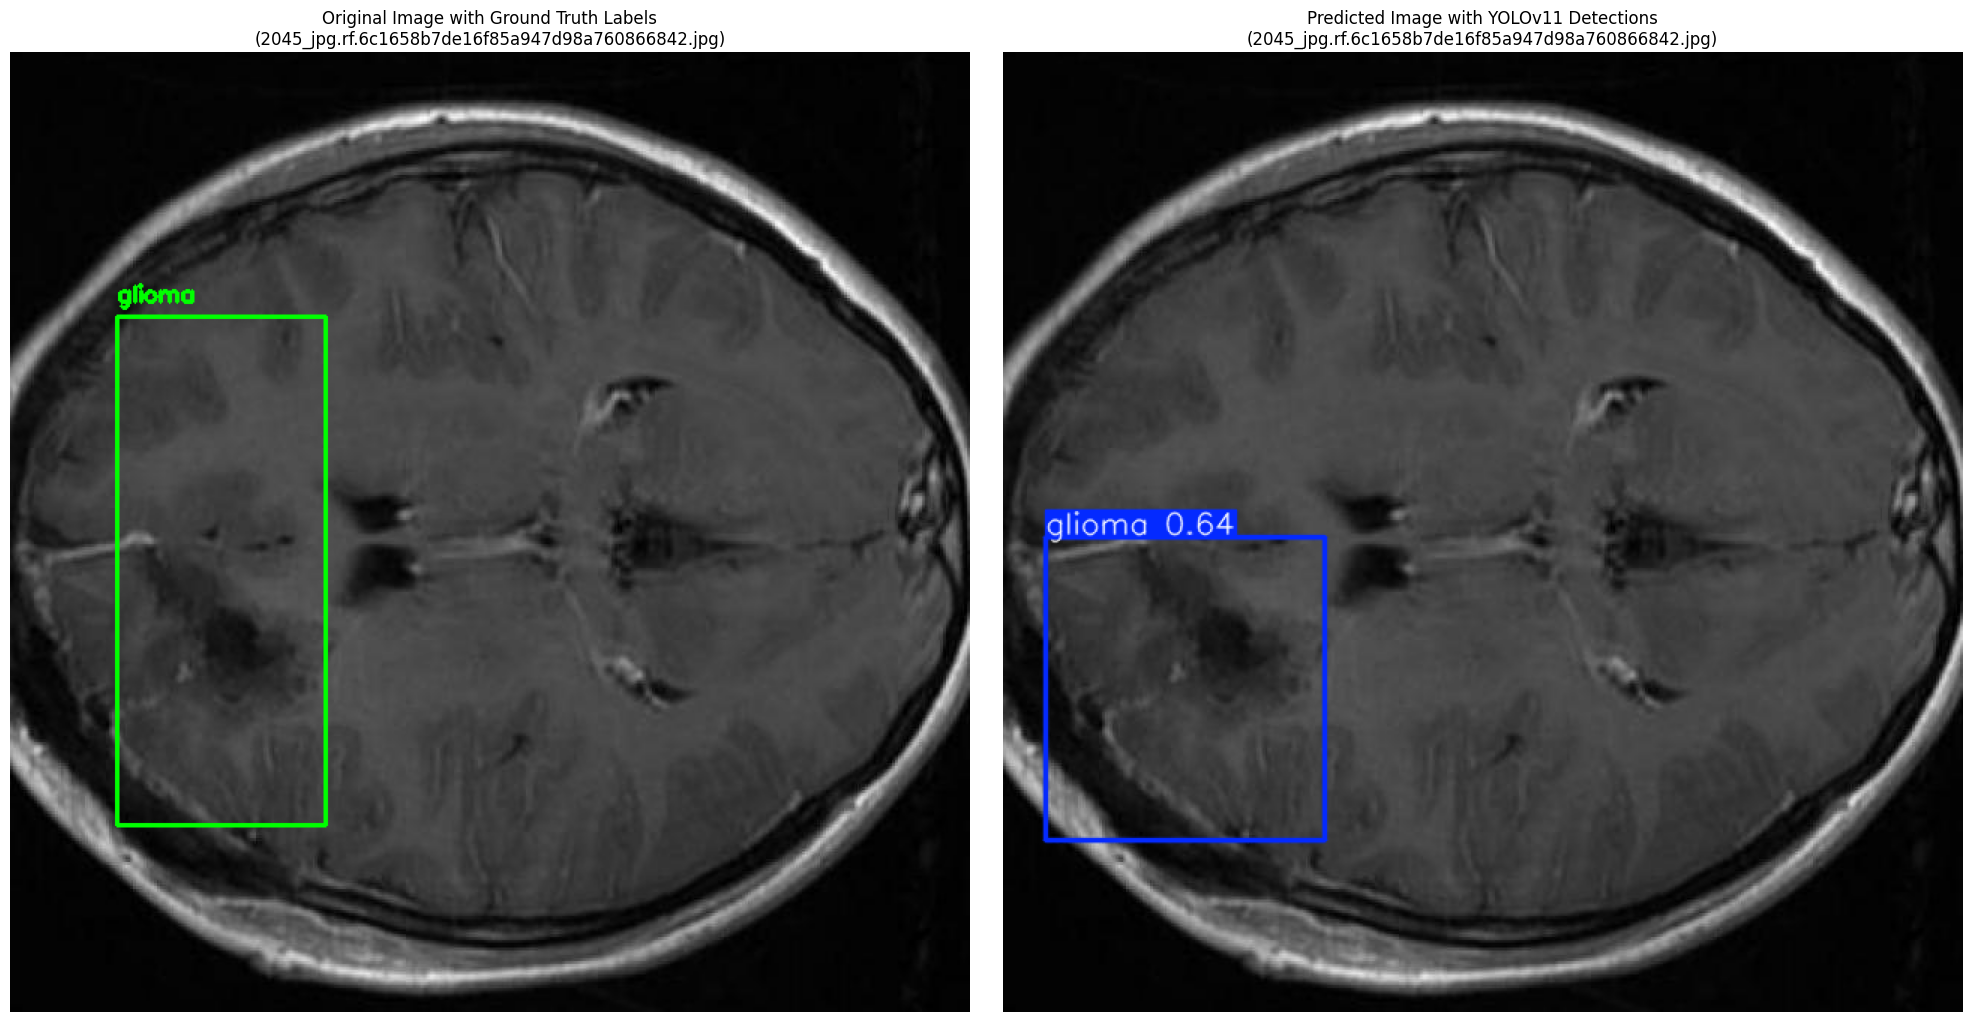


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1951_jpg.rf.eb08d051c58cf70408f3def1b2f274de.jpg: 640x640 1 glioma, 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


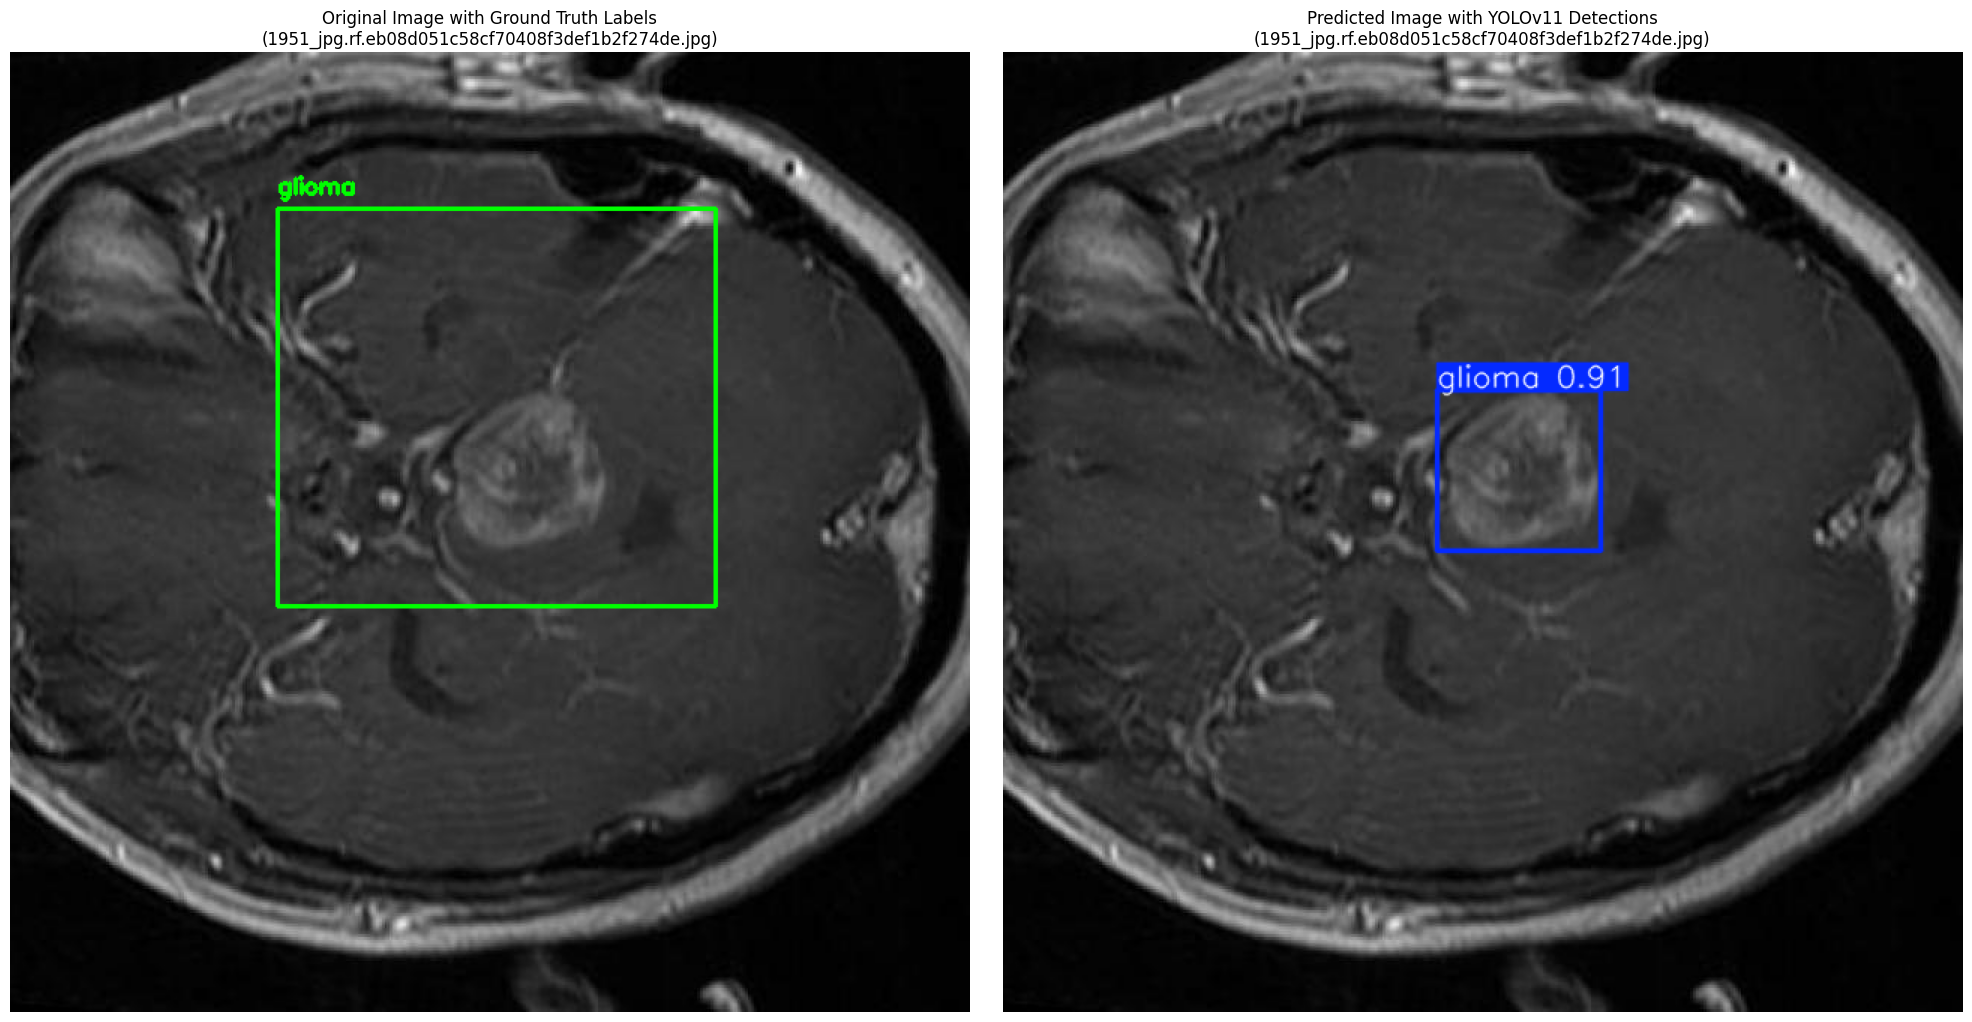


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1710_jpg.rf.36fe9d822cf5079600022f12aa2d0f3a.jpg: 640x640 1 pituitary, 5.5ms
Speed: 0.8ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


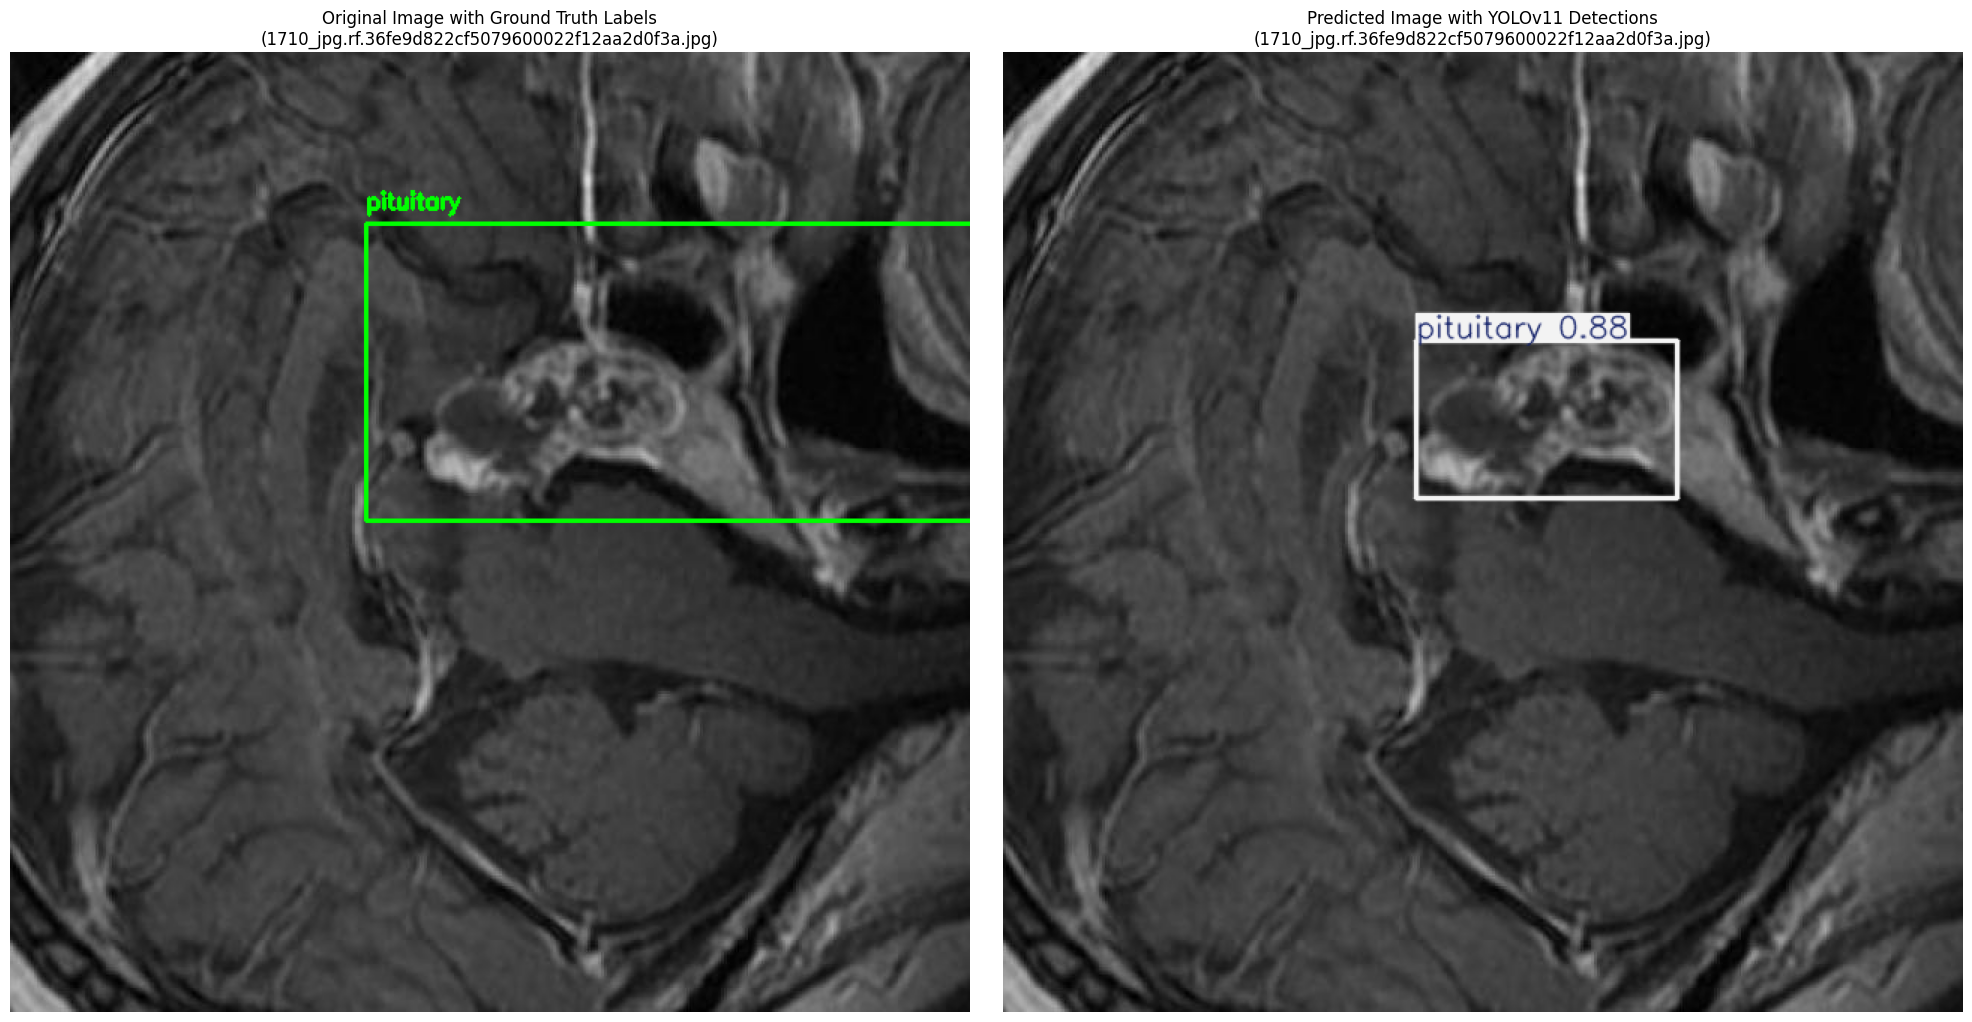


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/192_jpg.rf.8b107bb6b8fc883d1a0ae0cf4a5a330e.jpg: 640x640 1 meningioma, 5.3ms
Speed: 0.8ms preprocess, 5.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


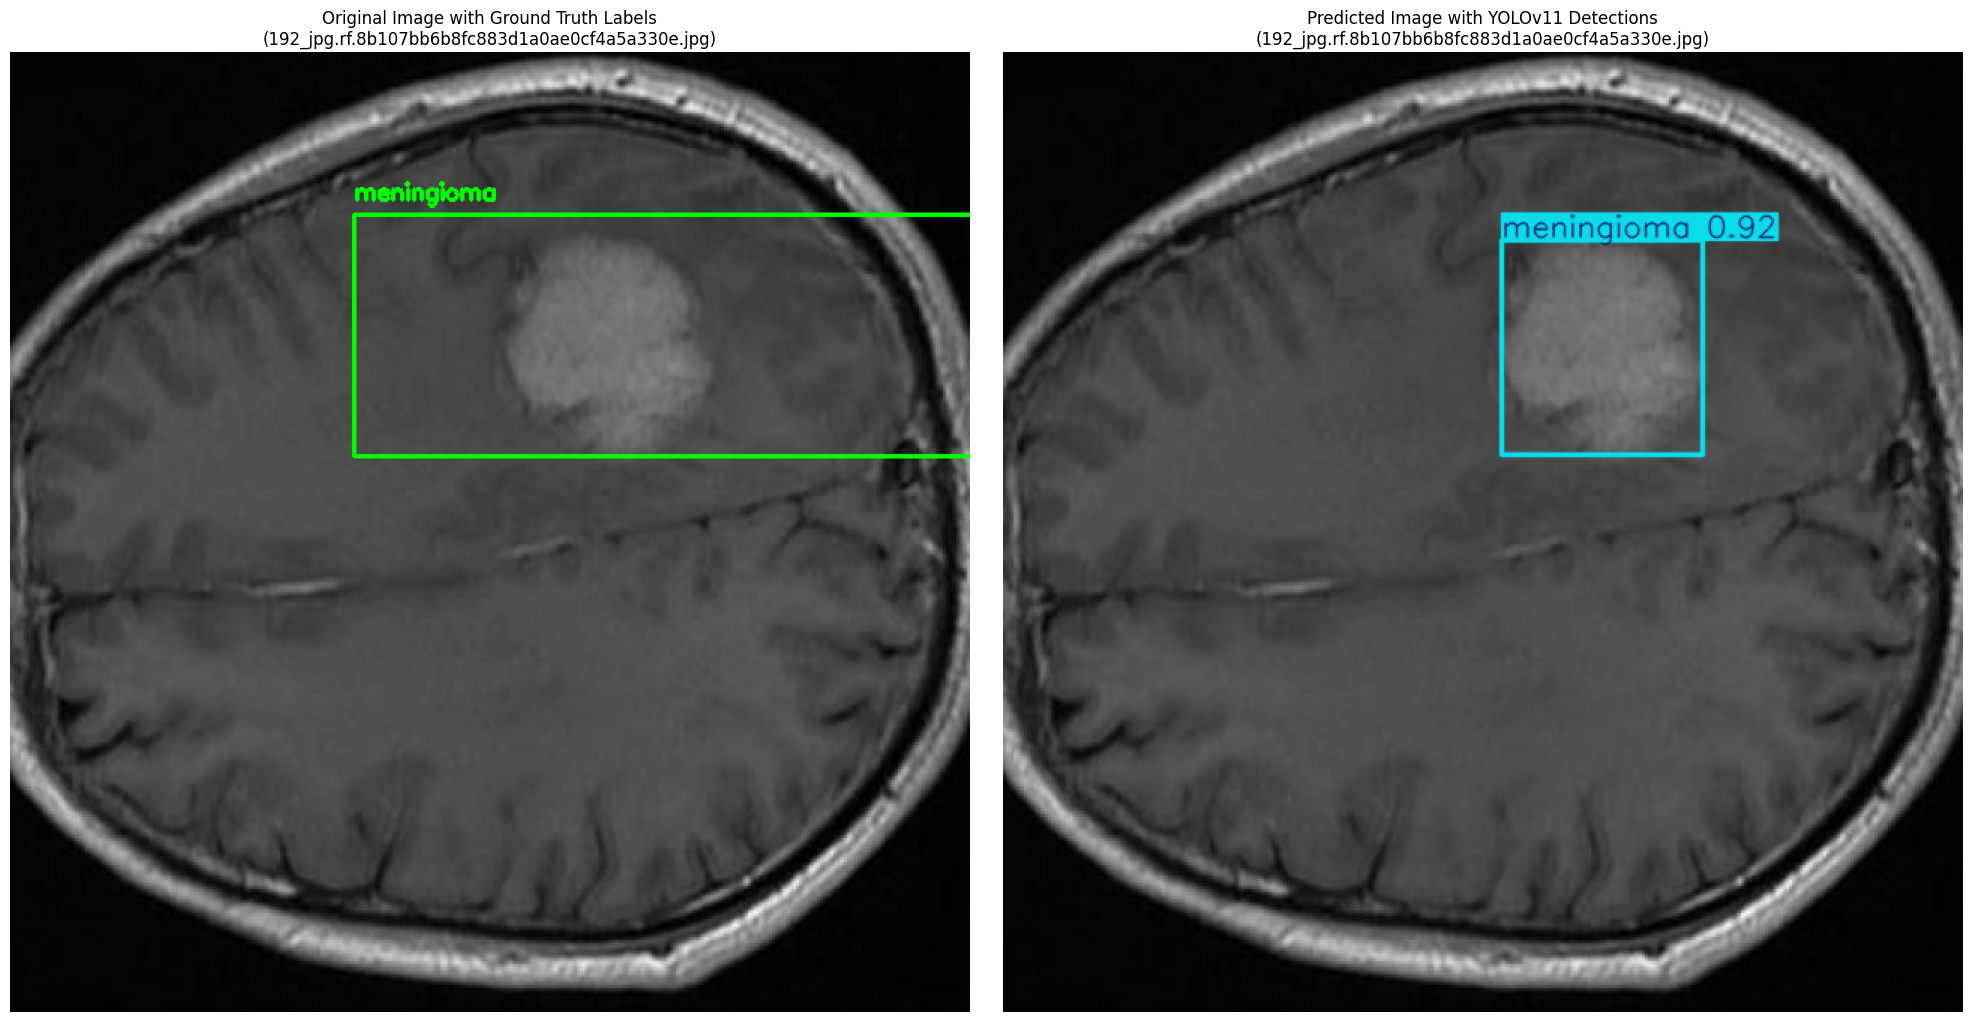


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2781_jpg.rf.175843f75a531e87b7bd8bb7eed737f8.jpg: 640x640 1 glioma, 5.5ms
Speed: 0.8ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


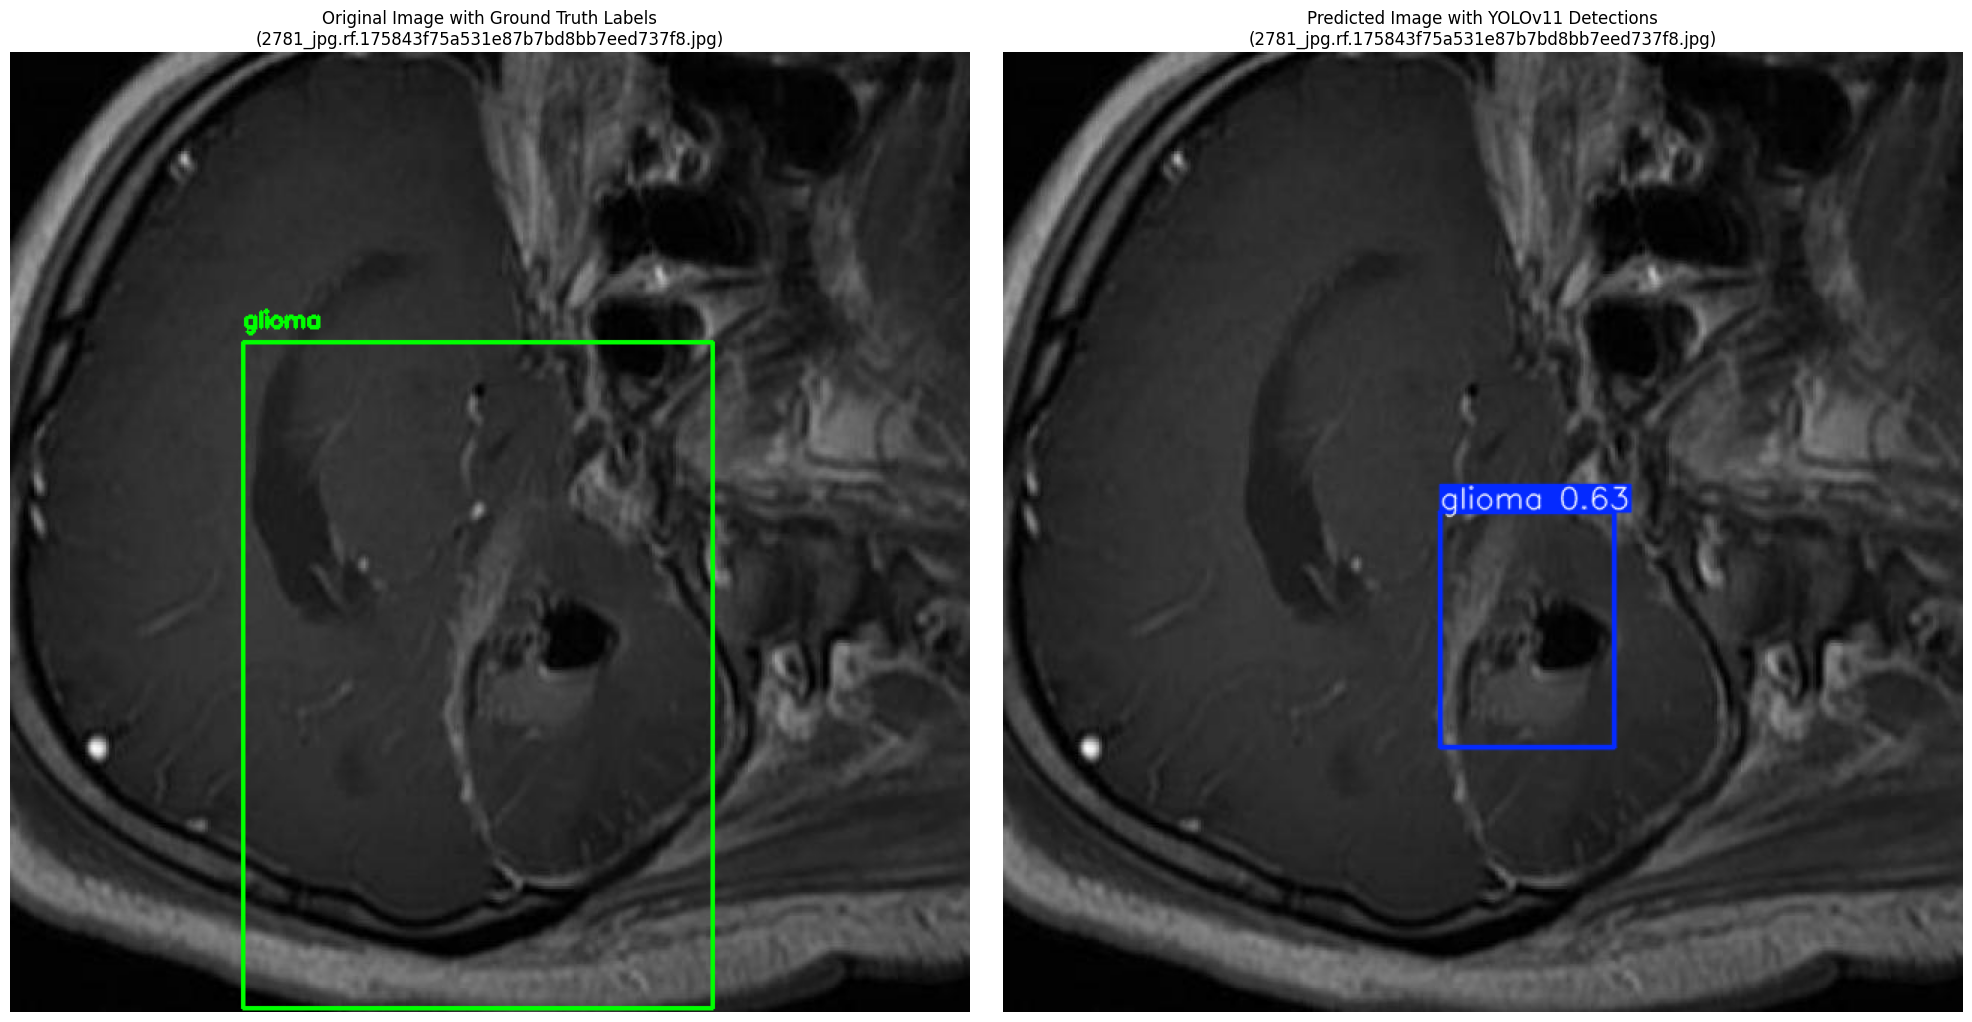


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2904_jpg.rf.cbc4872603a5087d632f8ae70af6dfe9.jpg: 640x640 1 glioma, 5.2ms
Speed: 0.8ms preprocess, 5.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


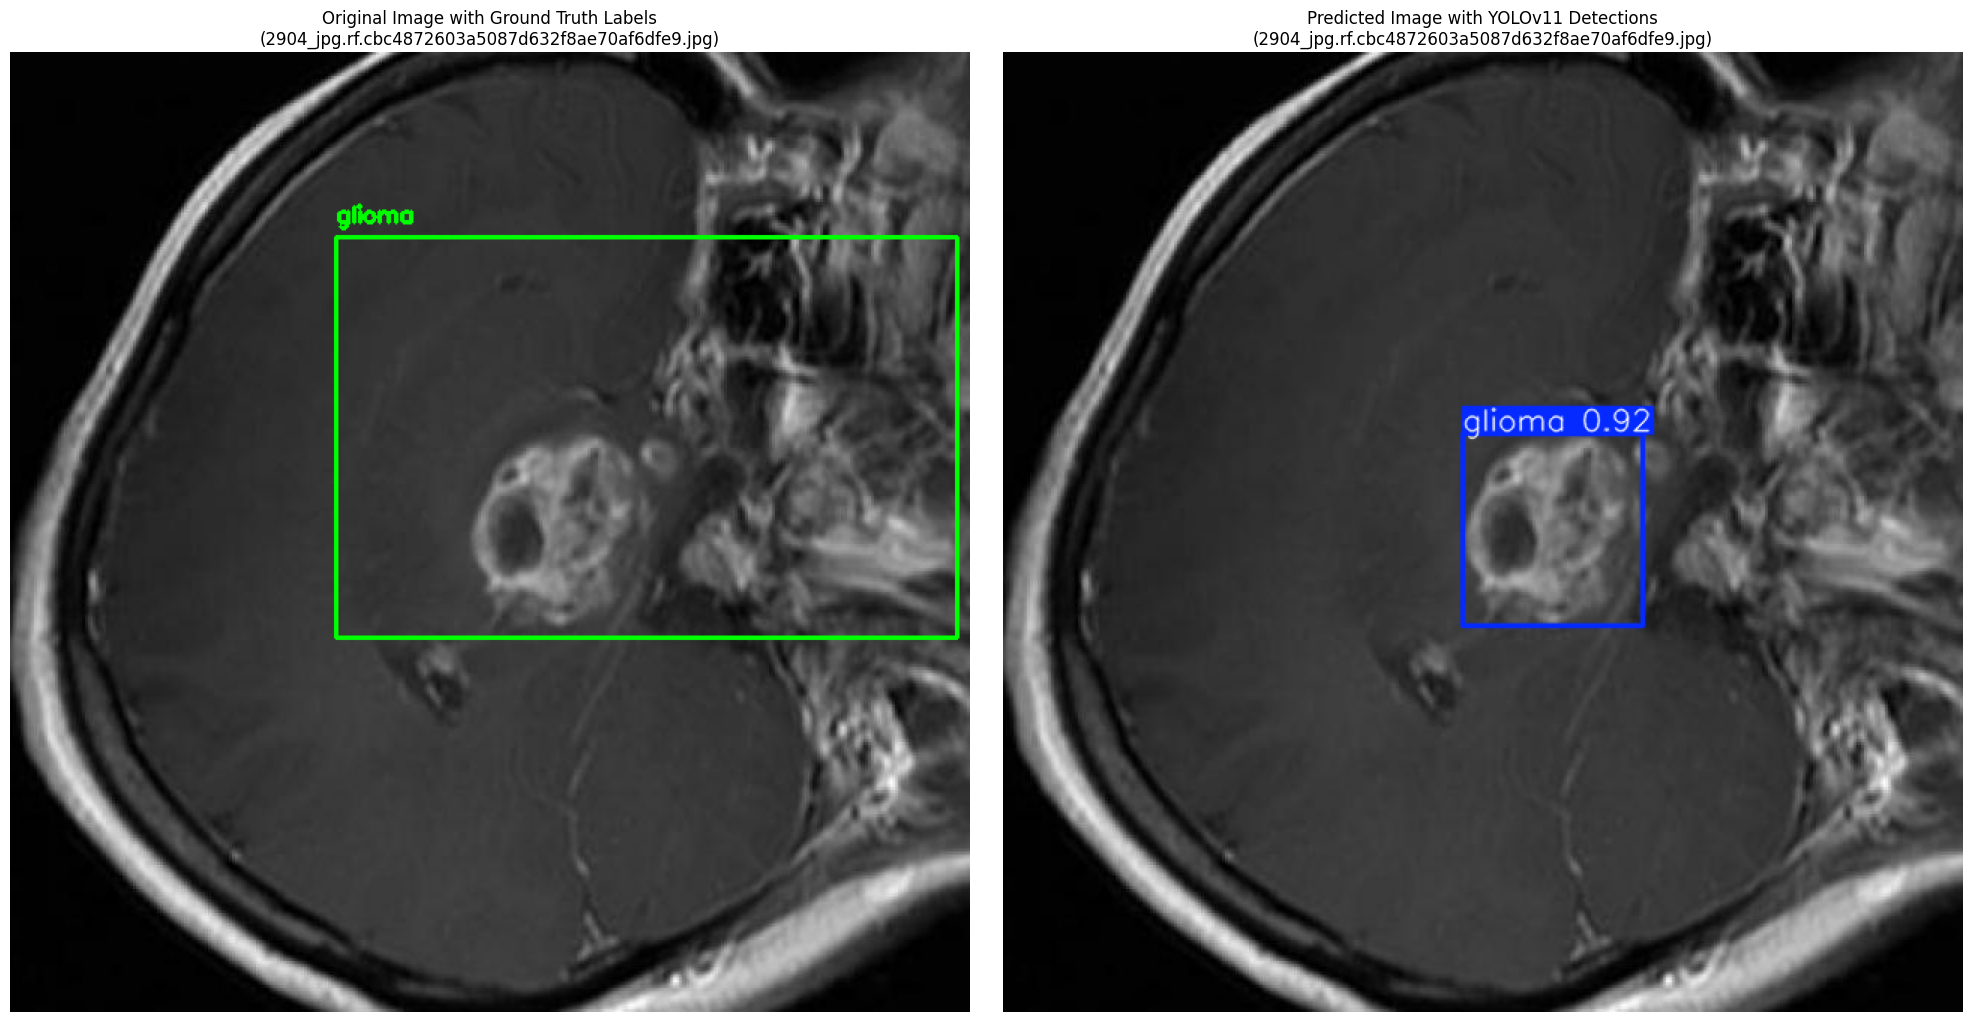


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/571_jpg.rf.ed65129e8c11ba5cc4761d5fbee49eff.jpg: 640x640 1 meningioma, 5.3ms
Speed: 0.8ms preprocess, 5.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


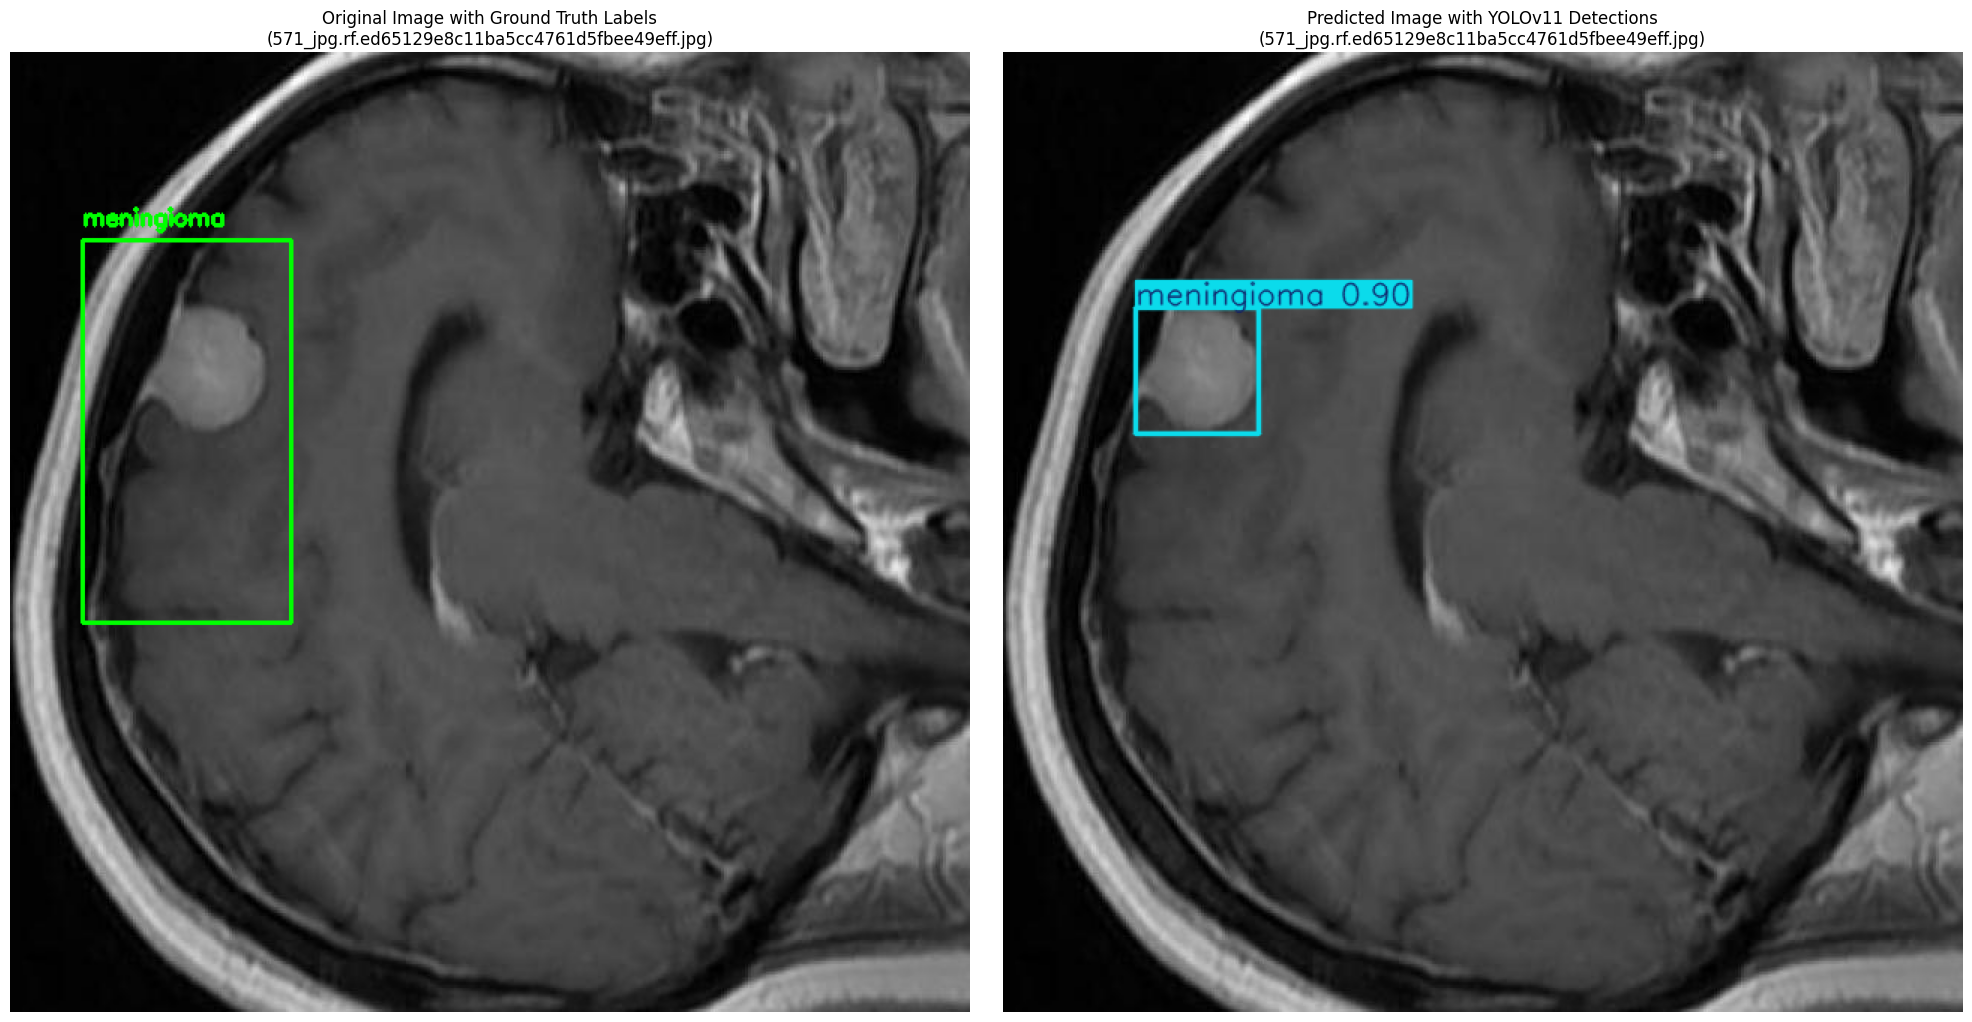


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg: 640x640 1 pituitary, 5.4ms
Speed: 0.8ms preprocess, 5.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


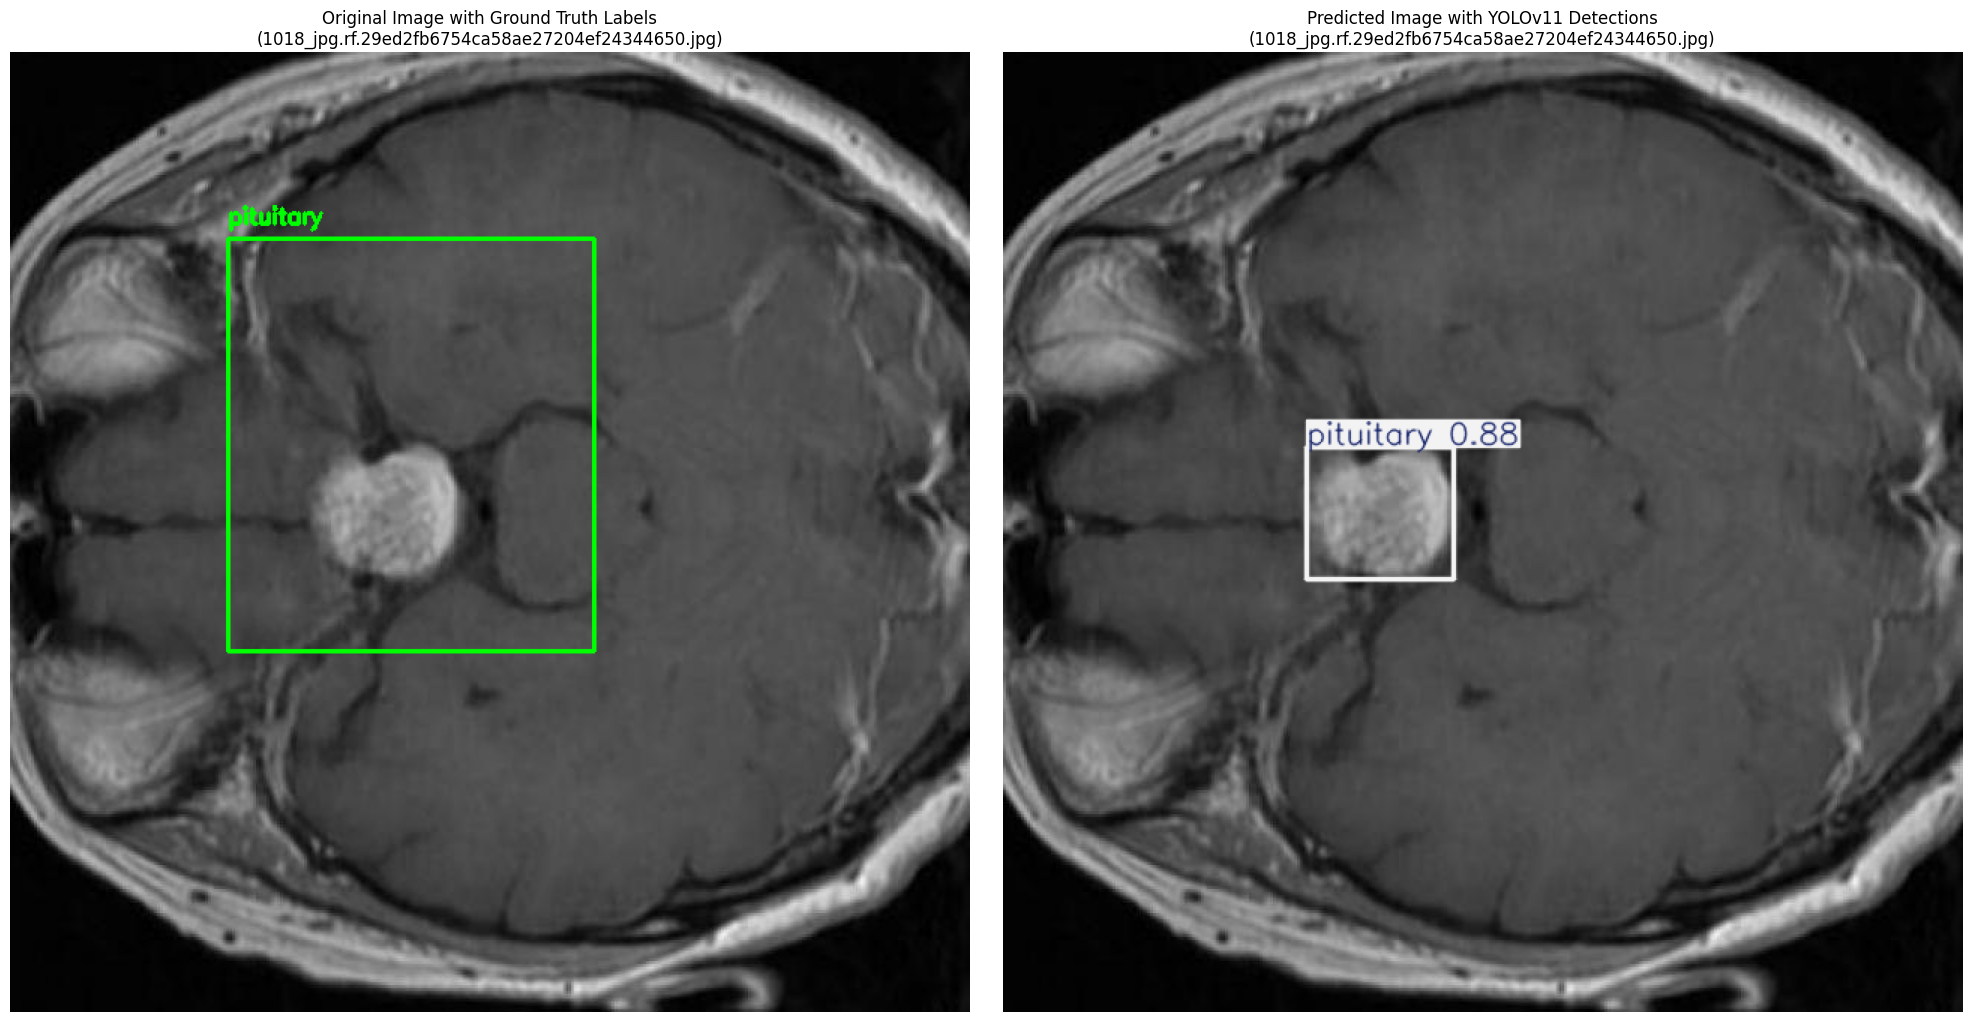


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1583_jpg.rf.ea41474e5ffc139718847dffa4d8c2ee.jpg: 640x640 1 pituitary, 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


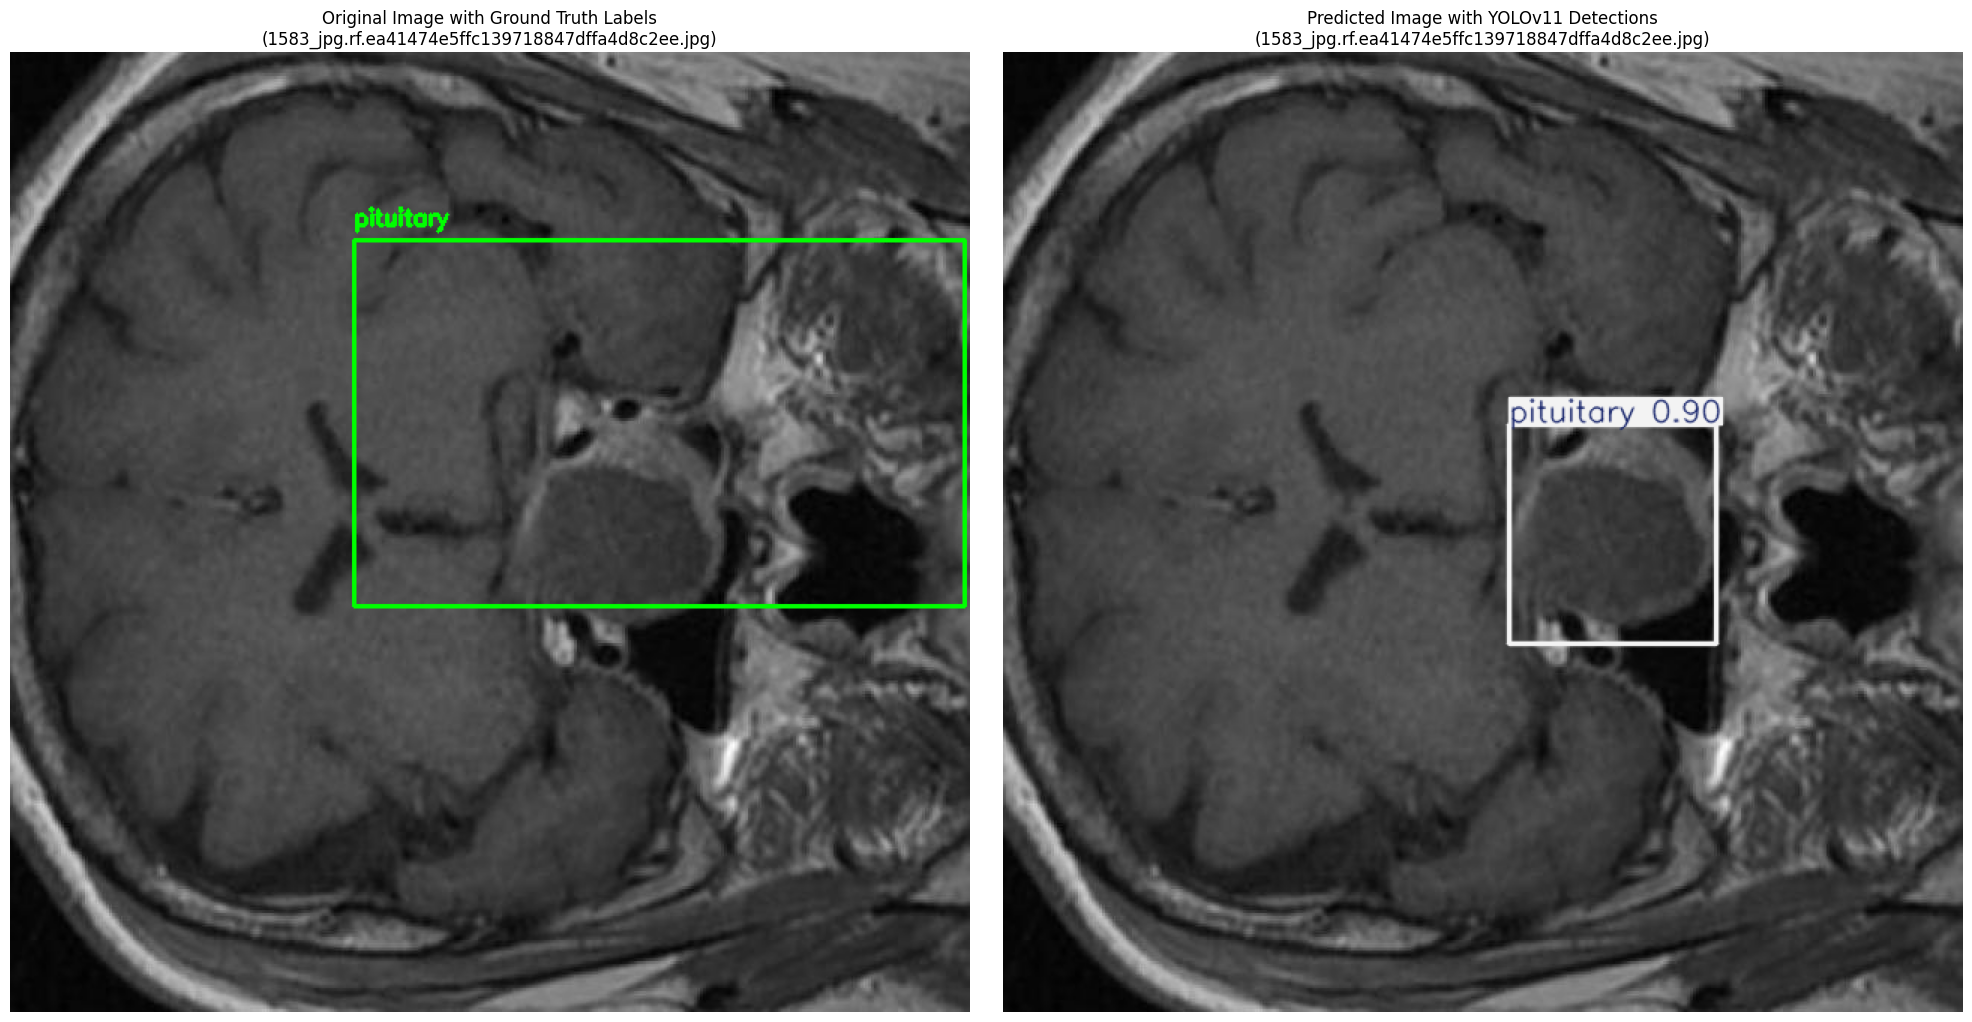


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/38_jpg.rf.1a9b0715faf5528bc2070c2b8e786241.jpg: 640x640 1 meningioma, 1 pituitary, 5.4ms
Speed: 0.8ms preprocess, 5.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


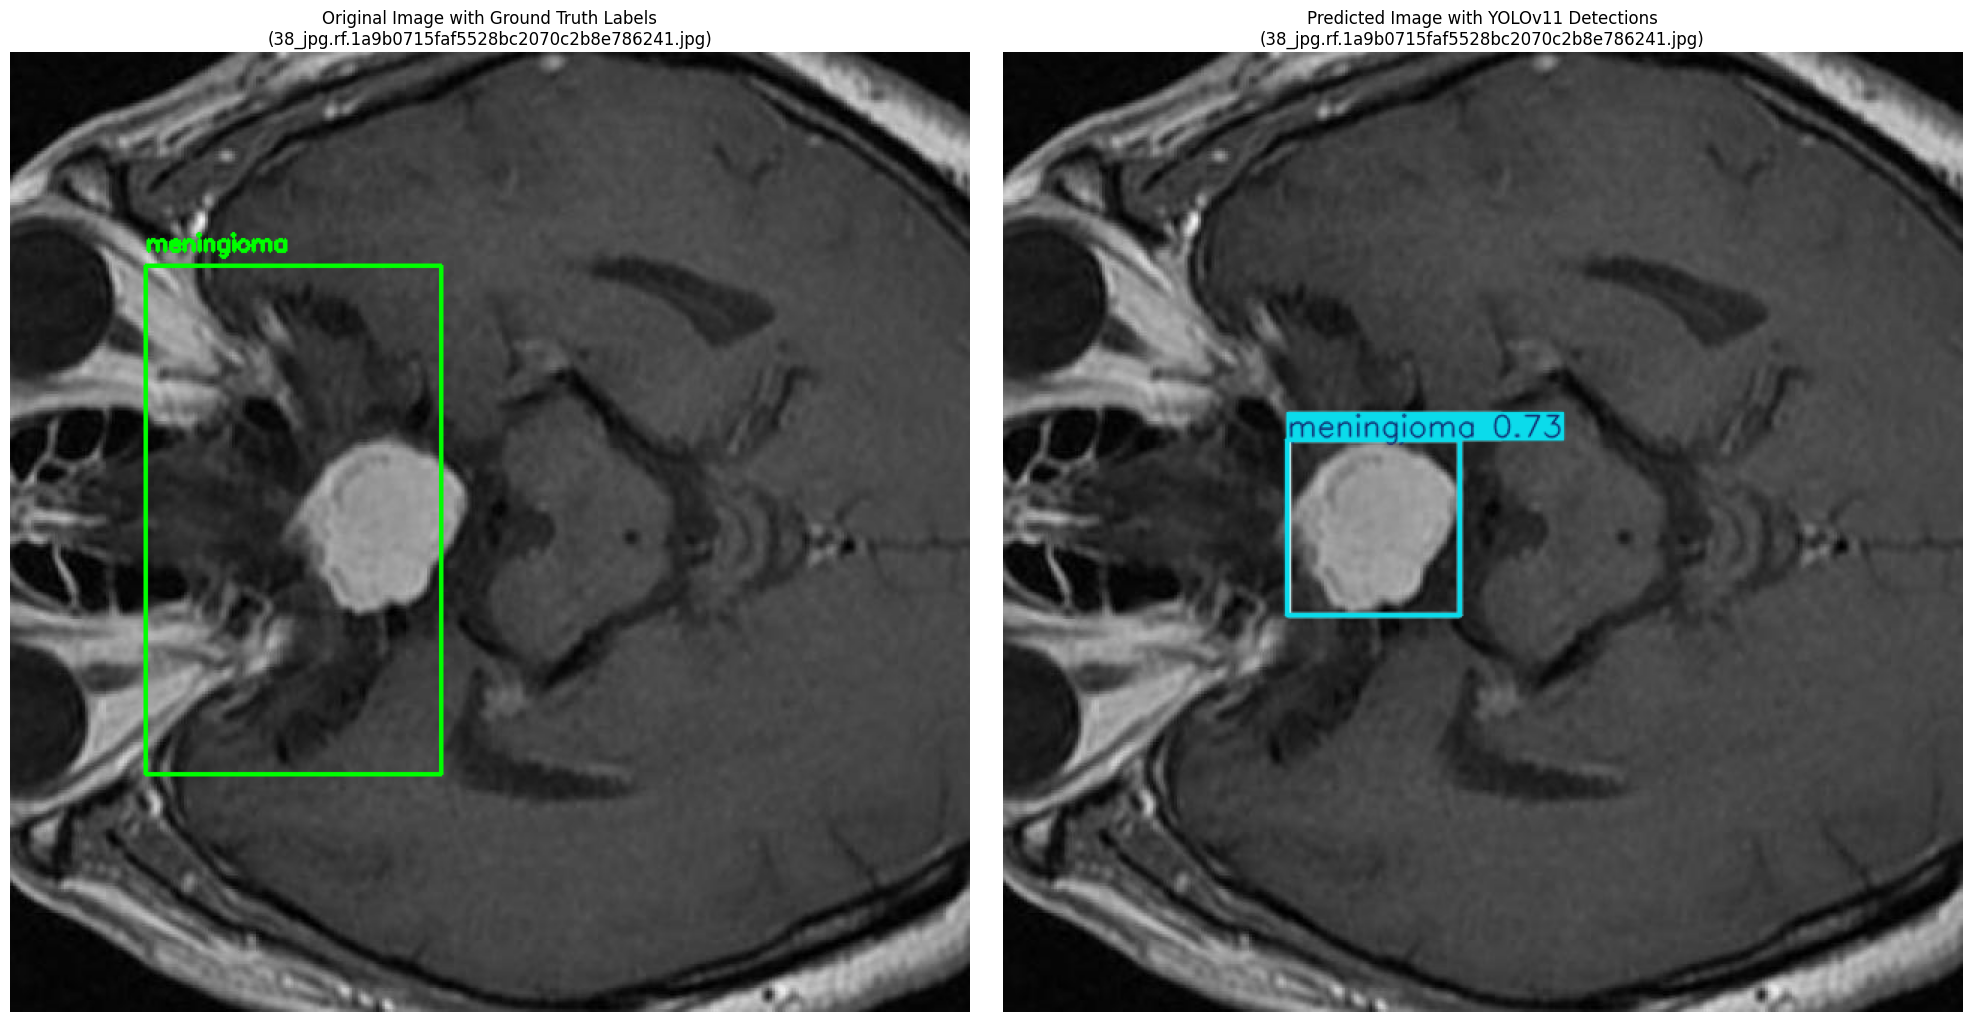

In [10]:
%matplotlib inline
for img_path in test_image_files:
    img_filename = os.path.basename(img_path)
    img_name_no_ext = os.path.splitext(img_filename)[0]
    label_path = os.path.join(TEST_LABELS_DIR, img_name_no_ext + '.txt')

    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    ground_truth_annotations = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                ground_truth_annotations.append(parts)

    ground_truth_image_display = draw_annotations(original_image.copy(), ground_truth_annotations, class_names, color=(0, 255, 0), is_gt=True)

    prediction_results = trained_model.predict(
        source=img_path,
        imgsz=IMG_SIZE,
        conf=CONF_THRESHOLD,
        # iou=IOU_THRESHOLD,
        # save=True,
        # save_txt=True,
        project=PREDICT_PROJECT_NAME,
        name=PREDICT_RUN_NAME,
        exist_ok=True
    )

    predicted_image_path_in_runs = os.path.join(PREDICT_PROJECT_NAME, PREDICT_RUN_NAME, img_filename)

    if os.path.exists(predicted_image_path_in_runs):
        predicted_image_display = cv2.imread(predicted_image_path_in_runs)
        predicted_image_display = cv2.cvtColor(predicted_image_display, cv2.COLOR_BGR2RGB)
    else:
        print(f"Warning: Predicted image not found at {predicted_image_path_in_runs}. Plotting from results.")
        if prediction_results:
            r = prediction_results[0]
            im_np = r.plot()
            predicted_image_display = cv2.cvtColor(im_np, cv2.COLOR_BGR2RGB)
        else:
            predicted_image_display = np.zeros_like(original_image)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(ground_truth_image_display)
    axes[0].set_title(f'Original Image with Ground Truth Labels\n({img_filename})')
    axes[0].axis('off')

    axes[1].imshow(predicted_image_display)
    axes[1].set_title(f'Predicted Image with YOLOv11 Detections\n({img_filename})')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()